<a href="https://colab.research.google.com/github/Emersonmiady/bootcamp-alura-ds/blob/main/modulo_3/analise_descritiva_e_testes_estatisticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from zipfile import ZipFile
from IPython.core.display import HTML
from IPython.display import Javascript
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import ztest
from scipy.stats import normaltest
from scipy.stats import ranksums

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Módulo 3

## 01. Educação, saúde e tipos de dados

In [ ]:
path = '/content/drive/MyDrive/Alura Bootcamp DS/Módulo 3/PeNSE_2015_AMOSTRA2.zip'

zip = ZipFile(path)

In [ ]:
zip.infolist()

[<ZipInfo filename='arquivos csv/' external_attr=0x10>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV' compress_type=deflate external_attr=0x20 file_size=7262170 compress_size=1235667>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=11420533 compress_size=1329882>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=5000642 compress_size=114324>,
 <ZipInfo filename='arquivos sas/' external_attr=0x10>,
 <ZipInfo filename='arquivos sas/pense_amostra2_aluno.sas7bdat' compress_type=deflate external_attr=0x20 file_size=24691712 compress_size=1957530>,
 <ZipInfo filename='arquivos sas/pense_amostra2_alunoescola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=45253632 compress_size=2461932>,
 <ZipInfo filename='arquivos sas/pense_amostra2_escola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=18105344 compress_size=332162>,
 <Zip

In [ ]:
zip.namelist()

['arquivos csv/',
 'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV',
 'arquivos sas/',
 'arquivos sas/pense_amostra2_aluno.sas7bdat',
 'arquivos sas/pense_amostra2_alunoescola.sas7bdat',
 'arquivos sas/pense_amostra2_escola.sas7bdat',
 'arquivos xlsx/',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx',
 'Dicionario_PENSE_Microdados_AMOSTRA2.xls']

In [ ]:
zip_path = zip.namelist()[1]
print(zip_path)

arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV


In [ ]:
df = pd.read_csv(zip.open(zip_path), sep=';', thousands='.',
                 decimal=',')
df.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [ ]:
df.shape

(16556, 181)

In [ ]:
df.columns

Index(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006',
       ...
       'ESTRATO_EXP', 'ESTRATOGEOREG', 'PESO', 'V0006', 'V0007', 'V0008',
       'V0041', 'aluno', 'escola', 'turma'],
      dtype='object', length=181)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [ ]:
zip.namelist()

['arquivos csv/',
 'arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV',
 'arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV',
 'arquivos sas/',
 'arquivos sas/pense_amostra2_aluno.sas7bdat',
 'arquivos sas/pense_amostra2_alunoescola.sas7bdat',
 'arquivos sas/pense_amostra2_escola.sas7bdat',
 'arquivos xlsx/',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNO.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ALUNOESCOLA.xlsx',
 'arquivos xlsx/PENSE_AMOSTRA2_ESCOLA.xlsx',
 'Dicionario_PENSE_Microdados_AMOSTRA2.xls']

In [ ]:
df.select_dtypes(include='float64')

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235
...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091


### Desafio 01 - Descompactar a pasta zipada usando outro método (Dica Allan, é utilizar comandos Bash).

In [ ]:
## !unzip "local do arquivo" -d "local a ser descompactado"
# !unzip '/content/drive/MyDrive/Alura Bootcamp DS/Módulo 3/PeNSE_2015_AMOSTRA2.zip' -d '/content/drive/MyDrive/Alura Bootcamp DS/Módulo 3/PeNSE_2015_AMOSTRA2'

### Desafio 02 - Estudar sobre a base de dados que vamos trabalhar (PeNSE - 2015 Amostra 2).

Aqui vai um vídeo curto explicativo, sobre a base de dados a ser estudada:

In [ ]:
HTML('<center><iframe width="853" height="480" src="https://www.youtube.com/embed/z4BBCHZUvD4" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"></iframe></center>')

### Desafio 03 - Classificar algumas perguntas como QualitativaXQuantitativa.

Exemplos de **Variáveis Qualitativas**:

- **Nominais**:

  - **REGEOGR**	- Região geográfica

  - **VB01001**	- Qual é o seu sexo?

  - **VB01002**	- Qual é a sua cor ou raça?

- **Ordinais**:

  - **VB01021** -	Em que ano/série você está?

  - **VB01025**	- Qual o grau de escolaridade mais elevado que você pretendo concluir?

  - **VB07006**	- NOS ÚLTIMOS 30 DIAS, com que frequência os colegas de sua escola trataram você bem e/ou foram prestativos contigo?

Exemplos de **Variáveis Quantitativas**:

- **Discretas**:

  - **VB01010A** - Contando com você, quantas pessoas moram na sua casa ou apartamento?

- **Contínuas**:

  - **VB17003**	- Peso do estudante, incluindo os imputados, com uma casa decimal 

  - **VB17004**	- Altura do estudante, incluindo os imputados, com uma casa decimal

  - **PESO** -	Peso do aluno de acordo com a amostra, utilizado para expansão



## 02. Dados qualitativos e tabelas de frequência

In [ ]:
df['VB01001'].value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

In [ ]:
df['VB01001'].value_counts(normalize=True) * 100

1    50.054361
2    49.945639
Name: VB01001, dtype: float64

In [ ]:
frequency = df['VB11007'].value_counts()
frequency

2     6920
1     4608
4     2326
3     1807
5      714
99     181
Name: VB11007, dtype: int64

In [ ]:
percentage = df['VB11007'].value_counts(normalize=True) * 100
percentage

2     41.797536
1     27.832810
4     14.049287
3     10.914472
5      4.312636
99     1.093259
Name: VB11007, dtype: float64

In [ ]:
answers = {
    1 : 'Muito satisfeito(a)',
    2 : 'Satisfeito(a)',
    3 : 'Indiferente',
    4 : 'Insatisfeito(a)',
    5 : 'Muito insatisfeito(a)',
    99 : 'Não informado'
}

freq_dist = pd.DataFrame({'frequencia':frequency, 'percentual':percentage})
freq_dist.rename(answers, inplace=True)
freq_dist.rename_axis('Sentimento em relação ao seu corpo', axis=1, inplace=True)
freq_dist

Sentimento em relação ao seu corpo,frequencia,percentual
Satisfeito(a),6920,41.797536
Muito satisfeito(a),4608,27.832810
Insatisfeito(a),2326,14.049287
Indiferente,1807,10.914472
Muito insatisfeito(a),714,4.312636
Não informado,181,1.093259


### Desafio 01 - Criar uma função para gerar as tabelas de frequência e fazer a análise de outras informações. Compartilhar no discord suas análises.

In [ ]:
def make_freq_table(df, column, question_title=None, answers_dict=None):
  freq = df[column].value_counts()
  pct = df[column].value_counts(normalize=True) * 100

  freq_table = pd.DataFrame({'frequencia':freq, 'percentual':pct})
  if question_title:
    freq_table.rename_axis(question_title, axis=1, inplace=True)
  if answers_dict:
    freq_table.rename(answers_dict, inplace=True)

  return freq_table

In [ ]:
foul_health_answers = {
    1 : 'Não faltei a escola nos últimos 12 meses por motivos de saúde',
    2 : '1 a 3 dias nos últimos 12 meses',
    3	: '4 a 7 dias nos últimos 12 meses',
    4	: '8 a 15 dias nos últimos 12 meses',
    5	: '16 dias ou mais nos últimos 12 meses',
    99 : 'Não informado'
}

make_freq_table(df, column='VB13006', answers_dict=foul_health_answers,
                question_title='NOS ÚLTIMOS 12 MESES, quantos dias você faltou a escola por motivo(s) relacionado(s) à sua saúde?')

"NOS ÚLTIMOS 12 MESES, quantos dias você faltou a escola por motivo(s) relacionado(s) à sua saúde?",frequencia,percentual
Não faltei a escola nos últimos 12 meses por motivos de saúde,8030,48.502054
1 a 3 dias nos últimos 12 meses,5540,33.462189
4 a 7 dias nos últimos 12 meses,1714,10.352742
8 a 15 dias nos últimos 12 meses,594,3.587823
16 dias ou mais nos últimos 12 meses,500,3.020053
Não informado,178,1.075139


## 03. Frequência em dados contínuos e pandas CrossTab

In [ ]:
df['IMC'] = df['VB17003'] / ((df['VB17004']/100)**2)
df['IMC']

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

In [ ]:
class_range = [0, 18.5, 25, 30, 60]
labels = ['abaixo', 'normal', 'sobrepeso', 'obesidade']

df['CLASSE_IMC'] = pd.cut(x=df['IMC'], bins=class_range, 
                          labels=labels, include_lowest=True)
df[['IMC', 'CLASSE_IMC']]

,IMC,CLASSE_IMC
0,15.051321,abaixo
1,21.727839,normal
2,18.502907,normal
3,23.322831,normal
4,28.122076,sobrepeso
...,...,...
16551,20.113223,normal
16552,17.930782,abaixo
16553,23.968489,normal
16554,18.995343,normal


In [ ]:
freq_dist = make_freq_table(df=df, column='CLASSE_IMC', question_title='classificacao_IMC')
freq_dist

classificacao_IMC,frequencia,percentual
normal,9188,55.496497
abaixo,4975,30.049529
sobrepeso,1760,10.630587
obesidade,633,3.823387


In [ ]:
sample_size = len(df)

k = int(1 + (10/3) * np.log10(sample_size))
df['CLASSE_ALTURA'] = pd.cut(x=df['VB17004'], bins=15, include_lowest=True)
freq_dist = make_freq_table(df, column='CLASSE_ALTURA')
freq_dist

,frequencia,percentual
"(157.327, 162.073]",3110,18.784731
"(152.58, 157.327]",2734,16.513651
"(162.073, 166.82]",2550,15.402271
"(166.82, 171.567]",2063,12.460739
"(147.833, 152.58]",1782,10.763469
"(171.567, 176.313]",1416,8.552791
"(143.087, 147.833]",1012,6.112588
"(176.313, 181.06]",749,4.524040
"(138.34, 143.087]",484,2.923411
"(181.06, 185.807]",300,1.812032


In [ ]:
df['VB17004'].min()

124.1

In [ ]:
df['VB17004'].max()

195.3

In [ ]:
cross_freq = pd.crosstab(df['VB11007'], df['VB01001'])
cross_freq.rename(index=answers, inplace=True)
cross_freq.rename(columns={1 : 'Masculino', 2 : 'Feminino'}, inplace=True)
cross_freq

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito(a),2682,1926
Satisfeito(a),3490,3430
Indiferente,950,857
Insatisfeito(a),786,1540
Muito insatisfeito(a),260,454
Não informado,119,62


In [ ]:
cross_freq = pd.crosstab(df['VB11007'], df['VB01001'], normalize=True) * 100
cross_freq.rename(index=answers, inplace=True)
cross_freq.rename(columns={1 : 'Masculino', 2 : 'Feminino'}, inplace=True)
cross_freq

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito(a),16.199565,11.633245
Satisfeito(a),21.079971,20.717565
Indiferente,5.738101,5.176371
Insatisfeito(a),4.747524,9.301764
Muito insatisfeito(a),1.570428,2.742208
Não informado,0.718773,0.374487


In [ ]:
cross_freq = pd.crosstab(df['VB11007'], df['VB01001'], normalize='columns') * 100
cross_freq.rename(index=answers, inplace=True)
cross_freq.rename(columns={1 : 'Masculino', 2 : 'Feminino'}, inplace=True)
cross_freq

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito(a),32.363944,23.291813
Satisfeito(a),42.114155,41.480227
Indiferente,11.463738,10.364010
Insatisfeito(a),9.484735,18.623776
Muito insatisfeito(a),3.137444,5.490386
Não informado,1.435984,0.749788


In [ ]:
cross_freq = pd.crosstab(df['VB11007'], df['VB01001'], normalize='index') * 100
cross_freq.rename(index=answers, inplace=True)
cross_freq.rename(columns={1 : 'Masculino', 2 : 'Feminino'}, inplace=True)
cross_freq

VB01001,Masculino,Feminino
VB11007,,
Muito satisfeito(a),58.203125,41.796875
Satisfeito(a),50.433526,49.566474
Indiferente,52.573326,47.426674
Insatisfeito(a),33.791917,66.208083
Muito insatisfeito(a),36.414566,63.585434
Não informado,65.745856,34.254144


### Desafio 01 - Criar uma tabela de frequência para o peso seguindo a regra de Sturges.

In [ ]:
df['CLASSE_PESO'] = pd.cut(x=df['VB17003'], bins=k, include_lowest=True)
freq_dist = make_freq_table(df=df, column='CLASSE_PESO')
freq_dist

,frequencia,percentual
"(46.32, 57.7]",5754,34.754772
"(34.94, 46.32]",3852,23.266489
"(57.7, 69.08]",3724,22.493356
"(69.08, 80.46]",1425,8.607151
"(23.56, 34.94]",927,5.599179
"(80.46, 91.84]",544,3.285818
"(91.84, 103.22]",202,1.220101
"(103.22, 114.6]",77,0.465088
"(114.6, 125.98]",20,0.120802
"(125.98, 137.36]",15,0.090602


### Desafio 02 - Criar outros CrossTabs para analisar outras variáveis, além das abordadas em aulas. Pesquisar sobre o parâmetro aggfunc e testar em pelo menos uma tabela criada.

In [ ]:
cross_freq = pd.crosstab(df['VB07007'], df['VB07008'], normalize='index',
                         rownames=['NOS ÚLTIMOS 30 DIAS, com que frequência algum dos seus colegas de escola te esculacharam, zoaram, mangaram, intimidaram ou caçoaram tanto que você ficou magoado, incomodado, aborrecido, ofendido ou humilhado?'],
                         colnames=['NOS ÚLTIMOS 30 DIAS, qual o motivo/causa de seus colegas terem te esculachado, zombado, zoado, caçoado, mangado, intimidado ou humilhado?']) * 100
cross_freq.rename(index={
    1 : 'Nunca',
    2 : 'Raramente',
    3 : 'Às vezes',
    4 : 'Na maior parte do tempo',
    5	: 'Sempre',
    99 : 'Não informado'}, inplace=True)
cross_freq.rename(columns={
    -1 : 'Pulo no questionário',
    1	: 'A minha cor ou raça',
    2	: 'A minha religião',
    3	: 'A aparência do meu rosto',
    4	: 'A aparência do meu corpo',
    5	: 'A minha orientação sexual',
    6	: 'A minha região de origem',
    7	: 'Outros motivos/causas',
    99 : 'Não informado'}, inplace=True)
cross_freq

"NOS ÚLTIMOS 30 DIAS, qual o motivo/causa de seus colegas terem te esculachado, zombado, zoado, caçoado, mangado, intimidado ou humilhado?",Pulo no questionário,A minha cor ou raça,A minha religião,A aparência do meu rosto,A aparência do meu corpo,A minha orientação sexual,A minha região de origem,Outros motivos/causas,Não informado
"NOS ÚLTIMOS 30 DIAS, com que frequência algum dos seus colegas de escola te esculacharam, zoaram, mangaram, intimidaram ou caçoaram tanto que você ficou magoado, incomodado, aborrecido, ofendido ou humilhado?",,,,,,,,,
Nunca,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Raramente,0.0,4.518498,2.937023,7.822649,12.962440,1.863880,1.412030,67.353855,1.129624
Às vezes,0.0,6.000000,3.921569,10.549020,15.882353,2.313725,1.647059,58.549020,1.137255
Na maior parte do tempo,0.0,5.671642,2.238806,14.925373,20.149254,3.582090,2.089552,50.298507,1.044776
Sempre,0.0,9.541284,4.036697,10.825688,20.366972,2.018349,2.385321,50.275229,0.550459
Não informado,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
cross_freq = pd.crosstab(df['VB07008'], df['VB01001'], normalize='index',
                         rownames=['NOS ÚLTIMOS 30 DIAS, qual o motivo/causa de seus colegas terem te esculachado, zombado, zoado, caçoado, mangado, intimidado ou humilhado?'],
                         colnames=['Qual é o seu sexo?']) * 100
cross_freq.rename(columns={1 : 'Masculino', 2 : 'Feminino'}, inplace=True)
cross_freq.rename(index={
    -1 : 'Pulo no questionário',
    1	: 'A minha cor ou raça',
    2	: 'A minha religião',
    3	: 'A aparência do meu rosto',
    4	: 'A aparência do meu corpo',
    5	: 'A minha orientação sexual',
    6	: 'A minha região de origem',
    7	: 'Outros motivos/causas',
    99 : 'Não informado'}, inplace=True)
cross_freq

Qual é o seu sexo?,Masculino,Feminino
"NOS ÚLTIMOS 30 DIAS, qual o motivo/causa de seus colegas terem te esculachado, zombado, zoado, caçoado, mangado, intimidado ou humilhado?",,
Pulo no questionário,49.113514,50.886486
A minha cor ou raça,65.508685,34.491315
A minha religião,56.846473,43.153527
A aparência do meu rosto,55.177305,44.822695
A aparência do meu corpo,44.414414,55.585586
A minha orientação sexual,71.875000,28.125000
A minha região de origem,57.142857,42.857143
Outros motivos/causas,49.766095,50.233905
Não informado,55.696203,44.303797


In [ ]:
cross_freq = pd.crosstab(df['VB07010'], df['VB01001'],
                         rownames=['Você já sofreu bullying?'],
                         colnames=['Qual é o seu sexo?'])
cross_freq.rename(columns={1 : 'Masculino', 2 : 'Feminino'}, inplace=True)
cross_freq.rename(index={
    1	: 'Sim',
    2	: 'Não',
    3	: 'Não sei o que é bullying',
    99 : 'Não informado'}, inplace=True)
cross_freq

Qual é o seu sexo?,Masculino,Feminino
Você já sofreu bullying?,,
Sim,3650,3934
Não,4378,4155
Não sei o que é bullying,227,160
Não informado,32,20


In [ ]:
cross_freq = pd.crosstab(df['VB07010'], df['VB01001'],
                         rownames=['Você já sofreu bullying?'],
                         colnames=['Qual é o seu sexo?'],
                         values=df['IMC'], aggfunc='mean')
cross_freq.rename(columns={1 : 'Masculino', 2 : 'Feminino'}, inplace=True)
cross_freq.rename(index={
    1	: 'Sim',
    2	: 'Não',
    3	: 'Não sei o que é bullying',
    99 : 'Não informado'}, inplace=True)
cross_freq

Qual é o seu sexo?,Masculino,Feminino
Você já sofreu bullying?,,
Sim,21.222677,21.456524
Não,20.537438,20.778654
Não sei o que é bullying,20.093492,20.469833
Não informado,19.825445,19.653441


## 04. Histograma e Boxplot

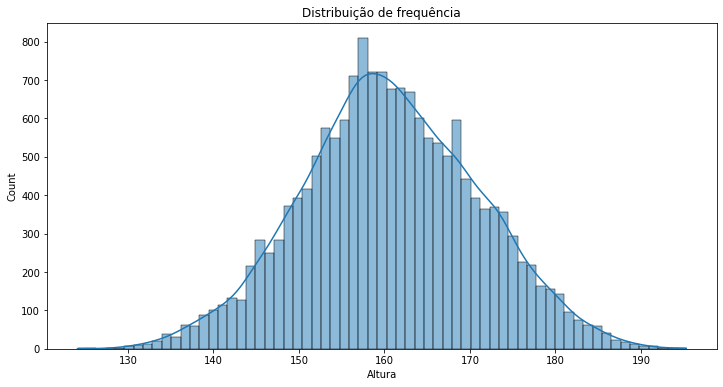

In [ ]:
ax = sns.histplot(x='VB17004', data=df, kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura')
ax;

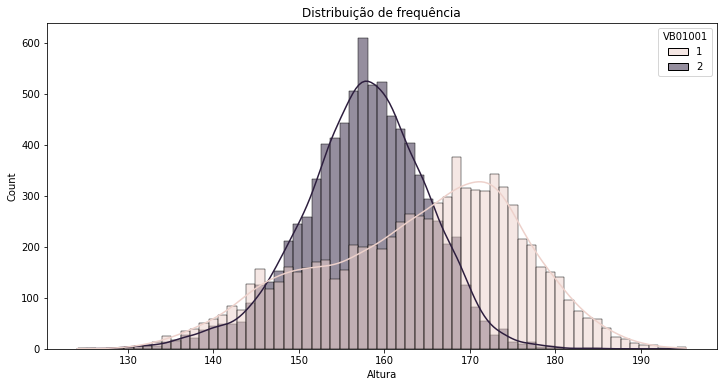

In [ ]:
ax = sns.histplot(x='VB17004', data=df, kde=True, hue='VB01001')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura')
ax;

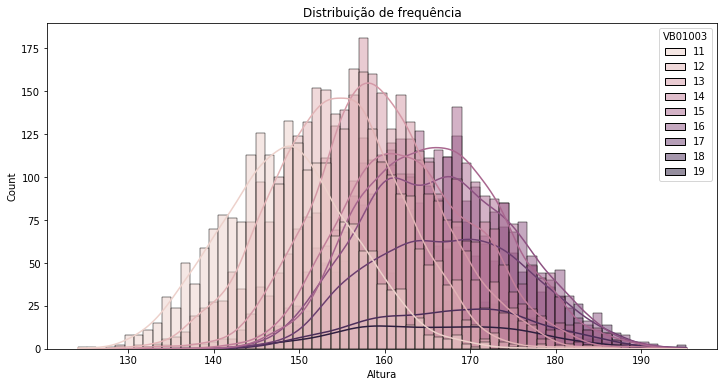

In [ ]:
ax = sns.histplot(x='VB17004', data=df, kde=True, hue='VB01003')
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura')
ax;

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


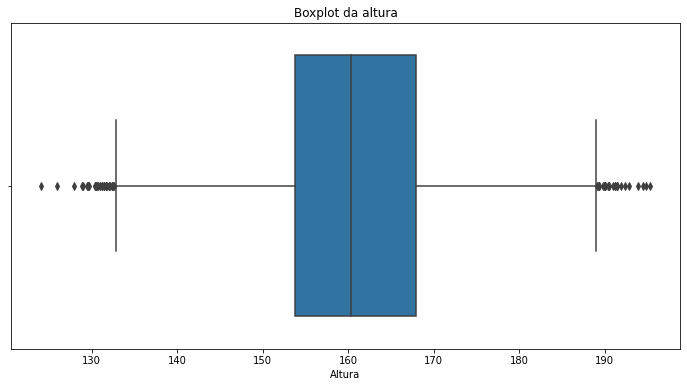

In [ ]:
ax = sns.boxplot(df['VB17004'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Boxplot da altura')
ax.set_xlabel('Altura')
ax;

In [ ]:
df['VB17004'].quantile(0.75)

167.9

In [ ]:
df['VB17004'].max()

195.3

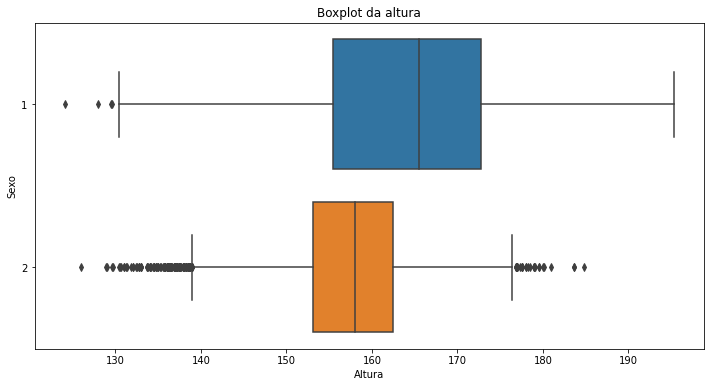

In [ ]:
ax = sns.boxplot(x='VB17004', y='VB01001', orient='h', data=df)
ax.figure.set_size_inches(12, 6)
ax.set_title('Boxplot da altura')
ax.set_xlabel('Altura')
ax.set_ylabel('Sexo')
ax;

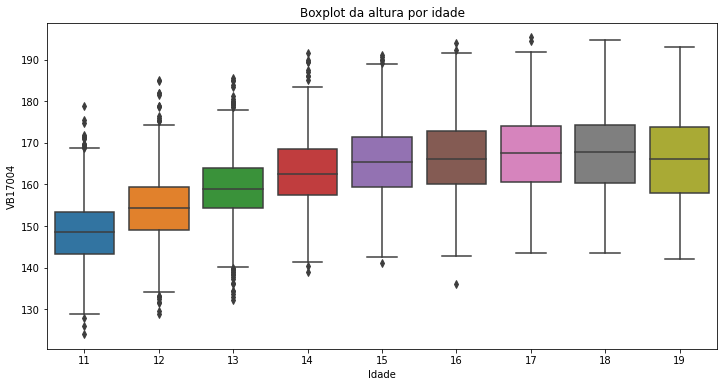

In [ ]:
ax = sns.boxplot(x='VB01003', y='VB17004', data=df)
ax.figure.set_size_inches(12, 6)
ax.set_title('Boxplot da altura por idade')
ax.set_xlabel('Idade')
ax;

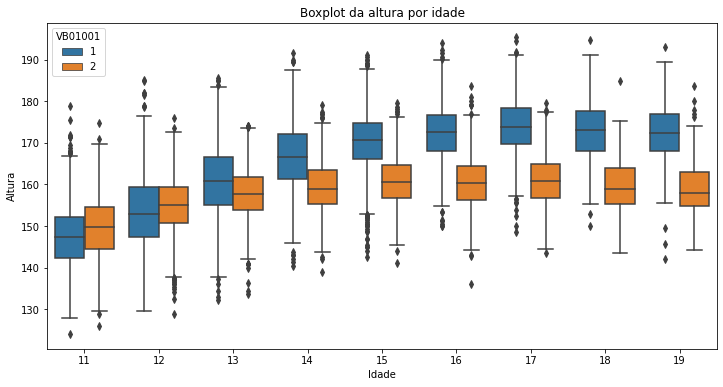

In [ ]:
ax = sns.boxplot(x='VB01003', y='VB17004', hue='VB01001', data=df)
ax.figure.set_size_inches(12, 6)
ax.set_title('Boxplot da altura por idade')
ax.set_xlabel('Idade')
ax.set_ylabel('Altura')
ax;

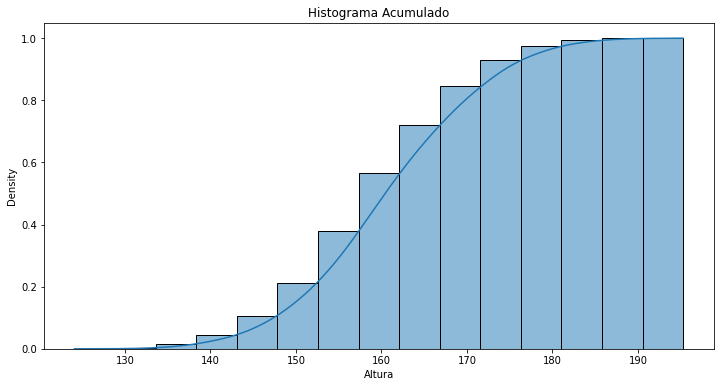

In [ ]:
ax = sns.histplot(x='VB17004', data=df, kde=True, 
                  cumulative=True, stat='density',
                  bins=15)
ax.figure.set_size_inches(12, 6)
ax.set_title('Histograma Acumulado')
ax.set_xlabel('Altura')
ax;

### Desafio 01 - Calcular o desvio padrão, média, moda e mediana e plotar no gráfico de histograma.

In [ ]:
wanted_info = [df['VB17004'].std(), df['VB17004'].mean(), 
               stats.mode(df['VB17004'])[0][0], df['VB17004'].median()]
wanted_info_index = ['desvio_padrao', 'media', 'moda', 'mediana']
pd.DataFrame(wanted_info, index=wanted_info_index, columns=['altura'])

,altura
desvio_padrao,10.340070
media,160.713113
moda,160.000000
mediana,160.400000


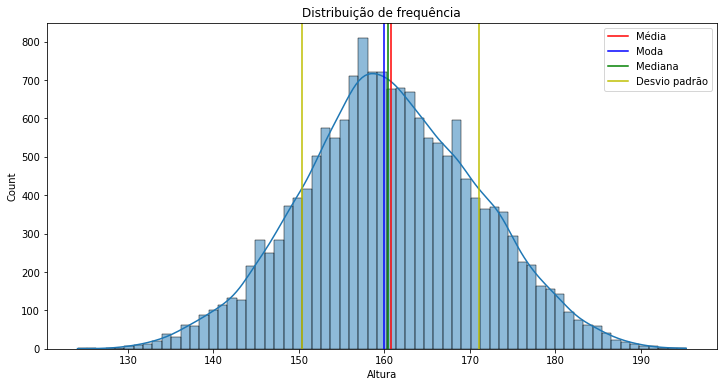

In [ ]:
ax = sns.histplot(x='VB17004', data=df, kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura')
plt.axvline(x=df['VB17004'].mean(), color='r', label='Média')
plt.axvline(x=stats.mode(df['VB17004'])[0][0], color='b', label='Moda')
plt.axvline(x=df['VB17004'].median(), color='g', label='Mediana')
plt.axvline(x=df['VB17004'].mean() - df['VB17004'].std(), color='y', 
            label='Desvio padrão')
plt.axvline(x=df['VB17004'].mean() + df['VB17004'].std(), color='y')
plt.legend()
ax;

### Desafio 02 - Fazer a análise com o histograma para outras informações da base de dados.

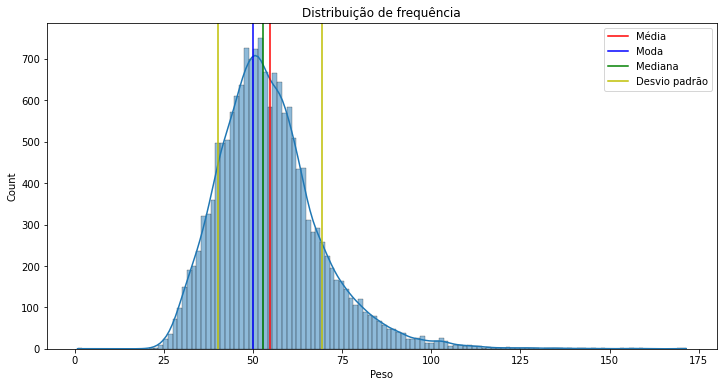

In [ ]:
ax = sns.histplot(x='VB17003', data=df, kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Peso')
plt.axvline(x=df['VB17003'].mean(), color='r', label='Média')
plt.axvline(x=stats.mode(df['VB17003'])[0][0], color='b', label='Moda')
plt.axvline(x=df['VB17003'].median(), color='g', label='Mediana')
plt.axvline(x=df['VB17003'].mean() - df['VB17003'].std(), color='y', 
            label='Desvio padrão')
plt.axvline(x=df['VB17003'].mean() + df['VB17003'].std(), color='y')
plt.legend()
ax;

### Desafio 03 - **Pesquisar como é determinado os outliers no boxplot do seaborn. Calcular na mão utilizando a função .quantile()

- **Limite Inferior** = Primeiro Quartil – 1,5 * (Terceiro Quartil – Primeiro Quartil)

- **Limite Superior** = Terceiro Quartil + 1,5 * (Terceiro Quartil – Primeiro Quartil)

In [ ]:
inf_lim = df['VB17004'].quantile(0.25) - 1.5 * (df['VB17004'].quantile(0.75) - df['VB17004'].quantile(0.25))
upp_lim = df['VB17004'].quantile(0.75) + 1.5 * (df['VB17004'].quantile(0.75) - df['VB17004'].quantile(0.25))

print(f'Limite inferior: {inf_lim}\nLimite superior: {upp_lim}')

Limite inferior: 132.65000000000003
Limite superior: 189.05


## 05. Medida de centralidade e dispersão

In [ ]:
df['VB17004'].mode()

0    160.0
dtype: float64

In [ ]:
df['VB17004'].mean()

160.71311307078818

In [ ]:
df.groupby('VB01001')['VB17004'].mean()

VB01001
1    163.860758
2    157.558617
Name: VB17004, dtype: float64

In [ ]:
df.groupby(['VB01001', 'VB01003'])['VB17004'].mean()

VB01001  VB01003
1        11         147.617753
         12         153.696764
         13         160.719801
         14         166.406922
         15         170.336297
         16         172.424933
         17         173.814341
         18         173.024561
         19         172.143158
2        11         149.522512
         12         154.965021
         13         157.673105
         14         159.340320
         15         160.759848
         16         160.386527
         17         160.907937
         18         159.438462
         19         158.977193
Name: VB17004, dtype: float64

In [ ]:
height_mean = df['VB17004'].mean()
df['MEDIA_ALTURA'] = height_mean

mean_difference = df['VB17004'] - height_mean
df['DIFERENCA_MEDIA'] = mean_difference

difference_squared = mean_difference ** 2
df['DIFERENCA_QUADRADO'] = difference_squared

df[['VB17004', 'MEDIA_ALTURA', 'DIFERENCA_MEDIA', 'DIFERENCA_QUADRADO']]

,VB17004,MEDIA_ALTURA,DIFERENCA_MEDIA,DIFERENCA_QUADRADO
0,157.0,160.713113,-3.713113,13.787209
1,152.0,160.713113,-8.713113,75.918339
2,161.4,160.713113,0.686887,0.471814
3,172.5,160.713113,11.786887,138.930703
4,167.5,160.713113,6.786887,46.061834
...,...,...,...,...
16551,167.9,160.713113,7.186887,51.651344
16552,185.8,160.713113,25.086887,629.351896
16553,159.4,160.713113,-1.313113,1.724266
16554,157.8,160.713113,-2.913113,8.486228


In [ ]:
sample_variance = difference_squared.sum() / (len(df) - 1)
sample_variance

106.91705244049119

In [ ]:
standard_deviation = np.sqrt(sample_variance)
standard_deviation

10.340070233827776

### Desafio 01 -Fazer a descrição de outras variáveis, analisar e compartilhas suas análises no discord.

In [ ]:
df.groupby(['V0007', 'VB01001'])['VB17003'].mean()

V0007  VB01001
1      1          56.148355
       2          52.640033
2      1          58.470331
       2          52.805097
Name: VB17003, dtype: float64

Temos que as crianças da escola privada (V0007 - item 2) possuem uma média de peso um pouco maior, no caso do sexo masculino (VB01001 - item 2). Já no feminino, a dependência administrativa da escola não é algo que diferencie tanto no peso. Além de que o peso masculino é maior que o feminino, em ambos os tipos escolares.

In [ ]:
df.groupby(['V0006', 'VB01001'])['VB17003'].mean()

V0006  VB01001
1      1          57.029994
       2          52.863253
2      1          51.427876
       2          49.113784
Name: VB17003, dtype: float64

As crianças das escolas urbanas (V0006 - item 1) apresentam, em média, pesos maiores, comparado com as rurais. Além disso, o sexo masculino apresenta um peso médio maior que o feminino, para os dois tipos de localidade.

### Desafio 02 - Fazer o calculo da média por sexo e idade, através do crosstab.

In [ ]:
cross_height_mean = pd.crosstab(df['VB01003'], df['VB01001'], 
                                values=df['VB17004'], aggfunc='mean', 
                                rownames=['Idade'], colnames=['Sexo'])
cross_height_mean.rename(columns={1 : 'Masculino', 2 : 'Feminino'},
                         inplace=True)
cross_height_mean

Sexo,Masculino,Feminino
Idade,,
11,147.617753,149.522512
12,153.696764,154.965021
13,160.719801,157.673105
14,166.406922,159.340320
15,170.336297,160.759848
16,172.424933,160.386527
17,173.814341,160.907937
18,173.024561,159.438462
19,172.143158,158.977193


### Super-desafio 01: Criar um dicionário para facilitar a busca da pergunta.

In [ ]:
dict_path_in_drive = '/content/drive/MyDrive/Alura Bootcamp DS/Módulo 3/PeNSE_2015_AMOSTRA2/Dicionario_PENSE_Microdados_AMOSTRA2.xls'

In [ ]:
df_dictionary = pd.read_excel(dict_path_in_drive, sheet_name='AMOSTRA2_ALUNO')
df_dictionary

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País
2,76,Brasil
3,REGEOGR,Região geográfica
4,1,Norte
...,...,...
1213,3,Confessional
1214,4,Filantrópica
1215,aluno,contador de aluno
1216,escola,UPA (unidade primária de amostragem)


In [ ]:
dict_pense = {}
for i in range(len(df_dictionary)):
  try:
    int(df_dictionary.iloc[i, 0])
  except ValueError:
    dict_pense[df_dictionary.iloc[i, 0]] = df_dictionary.iloc[i, 1]

dict_pense.pop('0 a 2999')
dict_pense

{'ANOPESQ': 'Ano em que a pesquisa foi realizada',
 'ESTRATOGEOREG': 'Indicador de estrato georeg',
 'ESTRATO_EXP': 'Expressão do estrato',
 'PAIS': 'País',
 'PESO': 'Peso do aluno de acordo com a amostra, utilizado para expansão',
 'REGEOGR': 'Região geográfica',
 'TEMPODESLOC': 'Refere-se ao tempo médio diário acumulado pelo escolar, com o deslocamento da casa para escola e da escola para casa feito a pé ou de bicicleta, nos últimos sete dias anteriores à pesquisa. Em minutos.',
 'TEMPOEDFIS': 'Refere-se ao tempo médio acumulado, nos últimos sete dias anteriores à pesquisa, que o escolar fez atividade física ou esporte durante as aulas de educação física na escola. Em minutos.',
 'TEMPOEST': 'A atividade física globalmente estimada refere-se ao número de dias que os escolares declararam fazer, pelo menos, uma hora por dia de atividade física, nos sete dias anteriores à pesquisa. Em minutos.',
 'TEMPOEXTRA': 'Refere-se ao tempo médio diário acumulado pelo escolar com a prática de algu

### Super-desafio 02: De alguma maniera sumarizar as perguntas para ficar mais curta. NLTK, GESIM...

## 06. Intervalo de confiança e Testes

In [ ]:
zconfint(df['VB17004'].to_list())

(160.5556082427712, 160.87061789880892)

In [ ]:
height_description = DescrStatsW(df['VB17004'])
height_description.tconfint_mean()

(160.55559672649298, 160.8706294150872)

In [ ]:
height_description

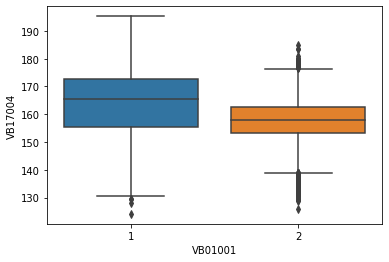

In [ ]:
sns.boxplot(x='VB01001', y='VB17004', data=df);

$H_0$: média populacional das alturas masculinas == média populacional das alturas femininas;

$H_1$: média populacional das alturas masculinas != média populacional das alturas femininas.

In [ ]:
m_height_dist = df.query('VB01001 == 1')['VB17004']
f_height_dist = df.query('VB01001 == 2')['VB17004']

ztest(m_height_dist, f_height_dist)

(41.16851708819389, 0.0)

In [ ]:
_ , p_value = ztest(m_height_dist, f_height_dist)
p_value

0.0

Sendo assim, rejeitamos a hipótese nula, ou seja, as médias populacionais entre os 2 sexos são diferentes. Certo?

Observação: o Z-test assume 2 premissas:
- O tamanho da amostra deve ser maior que 30;
- As amostras a serem comparadas devem se aproximar de uma normal.

Verifiquemos essas condições então (Recomenda-se fazer essa verificação antes de aplicarmos o Z-test).

In [ ]:
print(len(df.query('VB01001 == 1')), len(df.query('VB01001 == 2')))

8287 8269


In [ ]:
_ , p_value_normal_test_m = normaltest(m_height_dist)
_ , p_value_normal_test_f = normaltest(f_height_dist)

print(p_value_normal_test_m)
print(p_value_normal_test_f)

7.695118853996524e-75
7.125189471020874e-47


Como o p-value é um valor menor que 0.05 nos dois sexos, então rejeitamos a nossa hipótese nula, ou seja, a hipótese das amostras serem normais. 

Logo, o Z-test não é uma boa prática, e assim, temos que usar testes não-paramétricos.

Um desses testes é o "rank sums" (Wilcoxon Rank Sums), em que avalia, a partir de amostras independentes, se as duas distribuições são provenientes da mesma distribuição.


$H_0$: as duas distribuições são provenientes da mesma distribuição;

$H_1$: os valores em uma amostra são mais prováveis ​​de serem maiores do que os valores na outra amostra.

In [ ]:
ranksums(m_height_dist, f_height_dist)

RanksumsResult(statistic=40.7525576033863, pvalue=0.0)

Como o p-value é um valor abaixo de 0.05, então rejeitamos a hipótese nula, ou seja, os valores na amostra do sexo masculino são maiores que na do sexo feminino.

### Desafio 1: Estudar as medidas de dispersão e calcular utilizando o pandas, realizar os calculos para as outras colunas numéricas.

In [ ]:
wanted_df = df[['VB17003', 'VB17004', 'IMC']].rename(columns={'VB17003':'peso',
                                                              'VB17004':'altura'})
wanted_df.head()

,peso,altura,IMC
0,37.1,157.0,15.051321
1,50.2,152.0,21.727839
2,48.2,161.4,18.502907
3,69.4,172.5,23.322831
4,78.9,167.5,28.122076


In [ ]:
wanted_columns = ['peso', 'IMC']
for column in wanted_columns:
  print('----------------------------------------------------')
  print(f'Amplitude do {column}: {wanted_df[column].max() - wanted_df[column].min()}')
  print('----------------------------------------------------')
  print(f'Desvio médio absoluto do {column}: {wanted_df[column].mad()}')
  print('----------------------------------------------------')
  print(f'Variância do {column}: {wanted_df[column].var()}')
  print('----------------------------------------------------')
  print(f'Desvio padrão do {column}: {wanted_df[column].std()}')
  print('----------------------------------------------------\n\n')

----------------------------------------------------
Amplitude do peso: 170.7
----------------------------------------------------
Desvio médio absoluto do peso: 10.986241387923256
----------------------------------------------------
Variância do peso: 211.64035060768379
----------------------------------------------------
Desvio padrão do peso: 14.547864125282576
----------------------------------------------------


----------------------------------------------------
Amplitude do IMC: 57.081729376005875
----------------------------------------------------
Desvio médio absoluto do IMC: 3.18584316077019
----------------------------------------------------
Variância do IMC: 18.015283128347697
----------------------------------------------------
Desvio padrão do IMC: 4.244441438911331
----------------------------------------------------




### Desafio 2: Ler e pesquisar sobre o que é intervalo de confiança, nível de confiança e o que é significância.

### Desafio 3: Plotar o intervalo de confiança no histograma das alturas.

In [ ]:
inf_std_lim, upp_std_lim = zconfint(df['VB17004'].to_list())

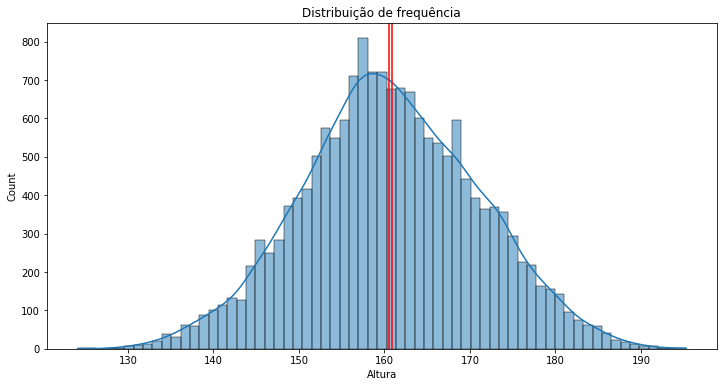

In [ ]:
ax = sns.histplot(x='VB17004', data=df, kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência')
ax.set_xlabel('Altura')
plt.axvline(x=inf_std_lim, color='r')
plt.axvline(x=upp_std_lim, color='r')
ax;

### Desafio 4: Realizar os testes de hipóteses de outras informações, explorando e enriquecendo a análise dos dados.